#     EDA OF SHOPPING MALLS OF TURKEY WITH SALES PREDICTION MODEL

Importing Necessary Labraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("customer_shopping_data.csv")
df.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


# Handeling Missing Values

In [5]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# 1)summary staticstics

In [7]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# 2)categorical summary

#Q1 Products category in the shopping cart

In [8]:
products=df['category'].unique()
print(products)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


#Q2 Different payments methods

In [9]:
pay_meth=df['payment_method'].unique()
print(pay_meth)

['Credit Card' 'Debit Card' 'Cash']


#Q3 Most purchased product

In [10]:
most_purch_prod=df['category'].value_counts().idxmax()
print(most_purch_prod)

Clothing


#Q4 Less purchased product

In [11]:
less_purch_prod=df['category'].value_counts().idxmin()
print(less_purch_prod)

Books


#Q5 Most used payment method for shopping

In [12]:
most_used_pay_meth=df['payment_method'].value_counts().idxmax()
print(most_used_pay_meth)

Cash


#Q6 Cusomers favorite destination for shopping

In [13]:
fav_shop_dest=df['shopping_mall'].value_counts().idxmax()
print(fav_shop_dest)

Mall of Istanbul


#Q7 what percentage of Male and Female customers did shopping

In [14]:
total_cust=df['gender'].value_counts()
print(total_cust)

Female    59482
Male      39975
Name: gender, dtype: int64


In [15]:
total_cust=df['gender'].count()
print(total_cust)

99457


In [16]:
female_cust=df['gender'].value_counts()['Female']
print(female_cust)

59482


In [17]:
male_cust=df['gender'].value_counts()['Male']
print(male_cust)

39975


In [18]:
female_per=female_cust/total_cust * 100
print(female_per.round(2))

59.81


In [19]:
male_per=male_cust/total_cust * 100
print(male_per.round(2))

40.19


#8 Reapeated customers for each shopping mall

In [20]:
rep_cust=df.duplicated()
print(rep_cust)

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool


# Data Vizualization using matplotlib and seaborn

Q1 What is the distribution of customers based on gender?

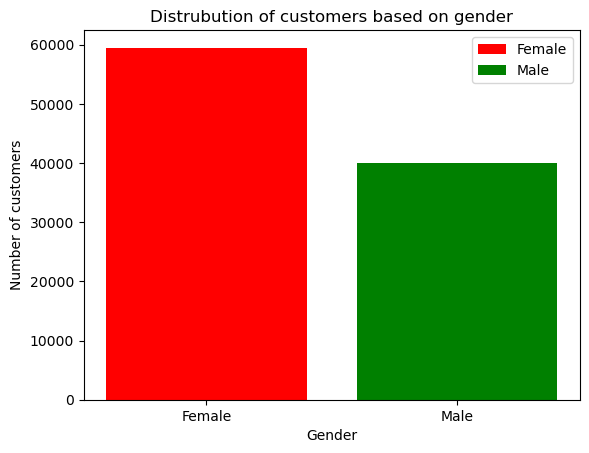

In [32]:
total_cust=df['gender'].value_counts()
colors=['red','green']
plt.bar(total_cust.index,total_cust.values,color=colors,label=['Female','Male'])
plt.xlabel('Gender')
plt.ylabel('Number of customers')
plt.title('Distrubution of customers based on gender')
plt.legend()
plt.show()

Q2 Which shopping mall has the highest number of customers?


In [22]:
df_cust_shop=df["shopping_mall"].value_counts()
df_cust_shop

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

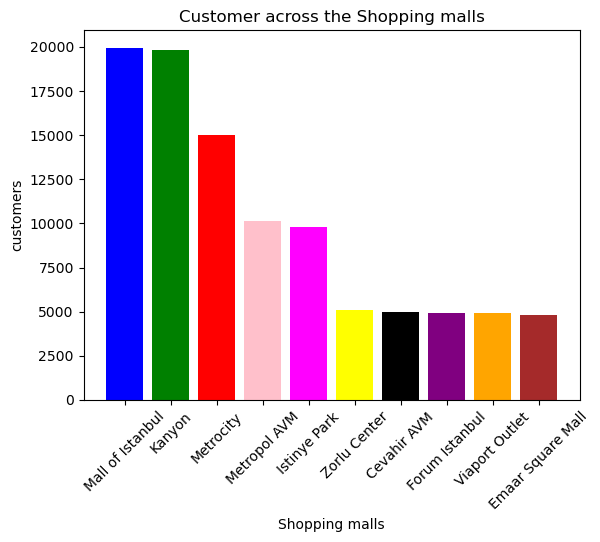

In [23]:
colors = ['blue', 'green', 'red', 'pink', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']
plt.bar(df_cust_shop.index,df_cust_shop.values,color=colors)
plt.xlabel("Shopping malls")
plt.ylabel("customers")
plt.xticks(rotation=45)
plt.title("Customer across the Shopping malls")
plt.show()

Q3 What is the distribution of payment methods used by customers?

In [24]:
pay_meth=df['payment_method'].value_counts()
pay_meth

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

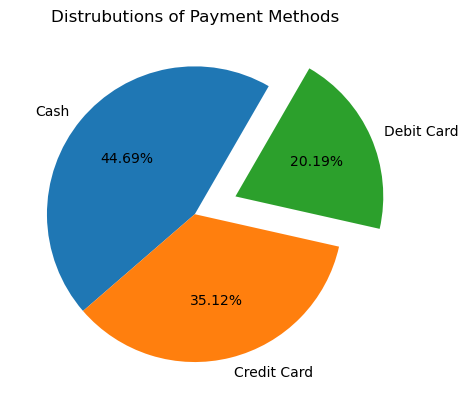

In [25]:
plt.pie(pay_meth.values,labels=pay_meth.index,startangle=60,explode=(0,0,0.3),autopct="%1.2f%%")
plt.title("Distrubutions of Payment Methods")
plt.show()

Q4 How does the quantity of products purchased vary across different categories?

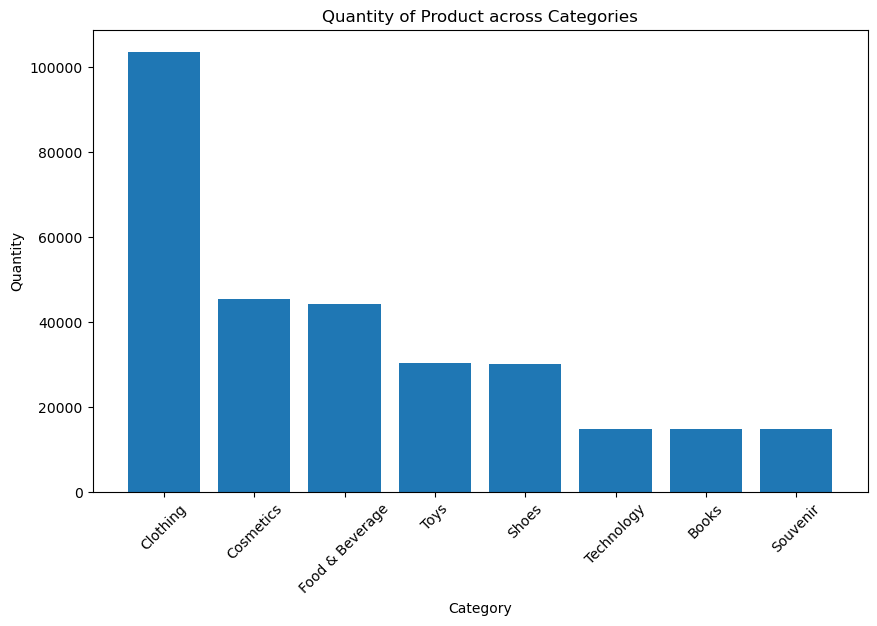

In [26]:
#group the data based on category 
prod_quan=df.groupby('category')['quantity'].sum()

#sorting in descending to get frequency for y-axis
prod_quan=prod_quan.sort_values(ascending=False)

#
plt.figure(figsize=(10,6))
plt.bar(prod_quan.index,prod_quan.values)
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Quantity of Product across Categories')
plt.xticks(rotation=45)
plt.show()


Q5 How is the customer age distribution?

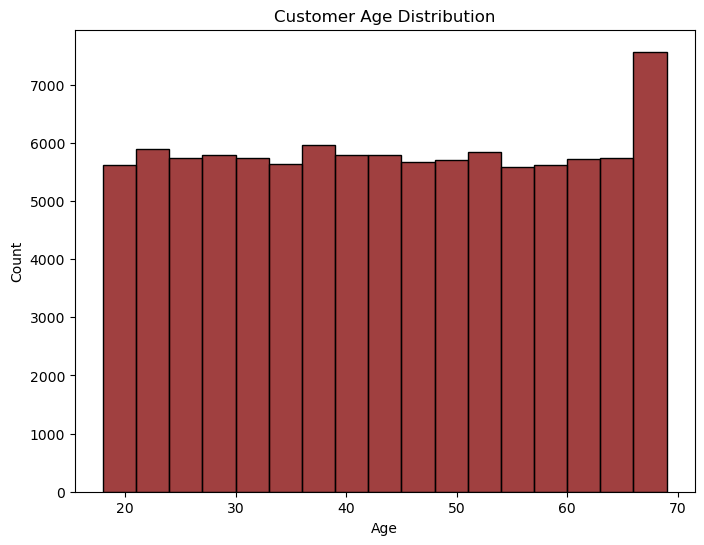

In [27]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=10, binwidth=3,color='maroon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Q6 Distribution of sales across the year?

In [28]:
df['invoice_date']=pd.to_datetime(df['invoice_date'],dayfirst=True)
df.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,2022-03-13,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,2021-08-22,Kanyon


In [29]:
df['month']=df['invoice_date'].dt.month
df.head(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,10


In [30]:
df_sales=df.groupby('month')['price'].sum()
df_sales.head(5)

month
1    7932626.63
2    7235297.32
3    6007346.21
4    5102478.76
5    5346926.82
Name: price, dtype: float64

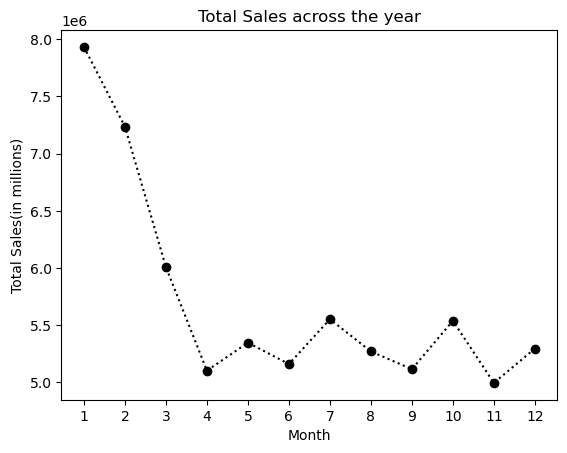

In [31]:
plt.plot(df_sales.index,df_sales.values,marker='o',linestyle='dotted',color='black')
plt.title('Total Sales across the year')
plt.xlabel('Month')
plt.ylabel('Total Sales(in millions)')
plt.xticks(range(1, 13))  # Set x-axis ticks from 1 to 12
plt.show()

# Machine Learning model to predict the sales in each month

In [50]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [48]:
month=df_sales.index
sales=df_sales.values
corr=np.corrcoef(month,sales)
corr

array([[ 1.        , -0.71070266],
       [-0.71070266,  1.        ]])

A negative correlation coefficient indicates an inverse relationship, where as the month increases, the sales tend to decrease. Conversely, as the month decreases, the sales tend to increase. The magnitude of the correlation coefficient (-0.7107) suggests a moderate strength of the relationship.

In [49]:
from scipy.stats import linregress
reg=linregress(month,sales)
reg

LinregressResult(slope=-182625.5094055944, intercept=6899679.636969697, rvalue=-0.7107026567112905, pvalue=0.009577638292677378, stderr=57165.366086898255, intercept_stderr=420725.7025963109)

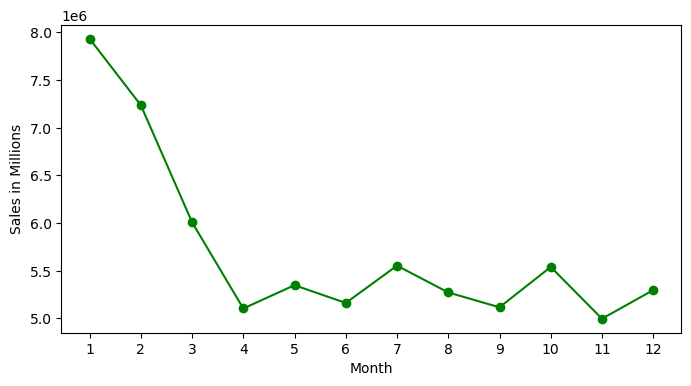

In [64]:
plt.figure(figsize=(8,4))
plt.plot(month,sales,'o',linestyle='solid',color='green')
plt.xlabel('Month')
plt.ylabel('Sales in Millions')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

 it appears that there is a non-linear pattern with higher sales in the first month due to festivals and the new year, followed by a gradual decrease in sales as the months progress.

Polynomial Regression: Instead of fitting a straight line, polynomial regression can capture non-linear relationships by including higher-order polynomial terms (e.g., quadratic or cubic) in the regression equation. This would allow the model to better fit the increasing and decreasing sales pattern over the months.

# SALES PREDICTION IN EACH MONTH

In [89]:
month=df_sales.index
sales=df_sales.values

month=np.array(month).reshape(-1,1)


#fitting polynomial model
poly_features = PolynomialFeatures(degree=2)  
month_poly = poly_features.fit_transform(month)

model = LinearRegression()
model.fit(month_poly, sales)

test_month=pd.DataFrame({'months':[1,2,3,4,5,6,7,8,9,10,11,12]})
test_month=np.array(test_month).reshape(-1,1)

# Generating predictions for test_month
test_month_poly = poly_features.transform(test_month)
pred_sales = model.predict(test_month_poly)

df_result=pd.DataFrame({'Month':df_sales.index,'Original_Sales':df_sales.values,'Predicted_Sales':pred_sales})
df_result['Predicted_Sales'] = df_result['Predicted_Sales'].apply('{:,.2f}'.format)
df_result

,Month,Original_Sales,Predicted_Sales
0,1,7932626.63,"7,579,209.90"
1,2,7235297.32,"6,926,317.61"
2,3,6007346.21,"6,367,478.67"
3,4,5102478.76,"5,902,693.09"
4,5,5346926.82,"5,531,960.86"
5,6,5160345.74,"5,255,282.00"
6,7,5552023.57,"5,072,656.49"
7,8,5270542.03,"4,984,084.34"
8,9,5115214.27,"4,989,565.54"
9,10,5538258.09,"5,089,100.10"


# Conclusion

Relationship between month and sales: The model captures the relationship between the month and sales by considering a polynomial equation. The predicted sales values are influenced by the month, taking into account the non-linear patterns observed in the data.

Model accuracy: The predicted sales values are reasonably close to the actual sales values for most of the months. However, there are some variations between the predicted and actual sales, indicating that the model may not capture all the factors influencing sales accurately.

Seasonal sales pattern: The model successfully captures the seasonal sales pattern, as evident from the predicted sales values aligning with the general trend of higher sales in the earlier months (January) and gradually decreasing sales in the later months (December).

Overall performance: The model seems to provide a reasonable estimation of sales based on the month.